### Introduction

This analysis uses 'California Housing Prices' dataset from sklearn.datasets. The dataset contains data from the 1990 California census. The dataset is published in Statistics and Probability Letters (1997), authored by R. Kelly Pace and Ronald Berry. There are 20640 observations and 9 variables. The independent variables are median income (MedInc), house age (HouseAge), average rooms (AveRooms), average bedrooms (AveBedrms), population (Population), average occupancy (AveOccup), latitude (Latitude) and longitude (Longitude). The dependent variable is median house value (MedHouseVal).

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore') 

#loading the dataset
california_housing = fetch_california_housing(as_frame=True)
data_housing = california_housing.frame

### Objective

The objective of the analysis is to apply Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression on the 'California Housing Prices' dataset and to compare the performance of these techniques.

### 1.1 Data Exploration and Preprocessing

In [2]:
data_housing.describe()
print(data_housing.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

From the initial exploration in Assignment 1, there are some significant observations from the dataset. Firstly, there are no missing values in the dataset as all variables have 20640 observations. Additionally, the average, minimum and maximum values of some variables such as average occupancy, population, average rooms, etc. show the need to conduct feature scaling in order to improve model performance due to large differences in values. Additionally, in Assignment 1, it was showcased through a correlation heatmap that median income (MedInc) had the highest positive correlation with the target- Median House Value (MedHouseVal).

Furthermore, the distribution of target variable also highlighted skewness and outliers in the distribution. The distribution is positively skewed with more outliers on the last value 5, which suggests that any value higher than 5 was capped to 5 for the purpose of the analysis. The target variable is measured in hundred of thousand of US dollars. 

In [3]:
#Separating features and target values
features_X = data_housing.drop('MedHouseVal', axis=1)
target_y = data_housing['MedHouseVal']

For the further analysis, the dataset is divided into features that include 8 variables and target which is MedHouseVal. 

In [4]:
#Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_X)
scaled_features_X = pd.DataFrame (scaled_features, columns= features_X.columns)

Due to the large differences in scales among features, standardization is done in order to avoid a dominant influence of one variable or value on the entire model. Standardization allows all features to have mean 0 and standard deviation 1. 

In [5]:
#Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(scaled_features_X, target_y, test_size=0.2, random_state=42)

The test size is set to 20% of the dataset while 80% will be used for training.  Using train_test_split, it shuffles the data and make it random while splitting it into two groups. 

### 1.2 Kernel Ridge Regression (KRR)

Kernel Ridge Regression (KRR) uses ridge regression but combines it with kernel tricks. It maps data into high dimensional feature space and is often used to handle non linear relationship. The regularization supports in fitting a model when there are outliers. Ridge regression penalizes larger coefficient values in order avoid overfitting. There are different kernel methods which use different hyperparameters.


To determine the best fit for the model, the analysis uses three different kernels - linear, polynomial and rbf. Linear Kernel focuses on dot products between features to analyse their similarities. Its better suited for linear relationship. Polynomial Kernel is suitable for non linear relationship as it also includes degree which captures complex underlying pattern. Radical Basis Function (RBF) is the most robust and flexible kernel method which is used to capture very intricate patterns as well. 

In the analysis, the main hyperparameter is the alpha for all methods, which is the regularization term. Hence, we are experimenting with different methods as well as finding the best hyperparameter.

#### 1.2.1 Linear KRR

In [6]:
linear_model = KernelRidge(kernel='linear')

# Hyperparameters
alpha = [0.01, 0.1, 0.5, 1.0]

# Tuning using GridSearchCV
param_grid = {'alpha': alpha}
grid_search_linear = GridSearchCV(linear_model, param_grid, cv=5)
grid_search_linear.fit(X_train, y_train)

# Result
print("Linear Kernel - GridSearchCV Results:")
print("Best Hyperparameter:", grid_search_linear.best_params_)

# Evaluate performance
best_linear_model = grid_search_linear.best_estimator_
y_pred_linear_best = best_linear_model.predict(X_test)
mse_linear_best = mean_squared_error(y_test, y_pred_linear_best)
r2_linear_best = r2_score(y_test, y_pred_linear_best)


print(f'Mean Squared Error (Best Model): {mse_linear_best}')
print(f'R2 score (Best Model): {r2_linear_best}')

Linear Kernel - GridSearchCV Results:
Best Hyperparameter: {'alpha': 1.0}
Mean Squared Error (Best Model): 4.849889672108063
R2 score (Best Model): -2.7010503992567125


#### 1.2.2 Polynomial Kernel

In [7]:
poly_model = KernelRidge(kernel='poly')

# Hyperparameters
alpha_poly = [0.01, 0.1, 0.5, 1.0]
degrees_poly = [2, 3]

# Tuning using GridSearchCV
param_grid_poly = {'alpha': alpha_poly, 'degree': degrees_poly}
grid_search_poly = GridSearchCV(poly_model, param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

# Result
print("\nPolynomial Kernel - GridSearchCV Results:")
print("Best Hyperparameters:", grid_search_poly.best_params_)

# Evaluate performance
best_poly_model = grid_search_poly.best_estimator_
y_pred_poly_best = best_poly_model.predict(X_test)
mse_poly_best = mean_squared_error(y_test, y_pred_poly_best)
r2_poly_best = r2_score(y_test, y_pred_poly_best)


print(f'Mean Squared Error on Test Set (Best Model): {mse_poly_best}')
print(f'R2 score (Best Model): {r2_poly_best}')


Polynomial Kernel - GridSearchCV Results:
Best Hyperparameters: {'alpha': 1.0, 'degree': 2}
Mean Squared Error on Test Set (Best Model): 0.43444581002228216
R2 score (Best Model): 0.668465481207642


#### 1.2.3. RBF Kernel

In [8]:
# RBF Kernel Ridge Regression
rbf_model = KernelRidge(kernel='rbf')

# Hyperparameters
alphas_rbf = [0.01, 0.1, 0.5, 1.0]
gammas_rbf = [0.01, 0.1, 1.0]

# Tuning using GridSearchCV
param_grid_rbf = {'alpha': alphas_rbf, 'gamma': gammas_rbf}
grid_search_rbf = GridSearchCV(rbf_model, param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train, y_train)

# Result
print("\nRBF Kernel - GridSearchCV Results:")
print("Best Hyperparameters:", grid_search_rbf.best_params_)

# Evaluate performance
best_rbf_model = grid_search_rbf.best_estimator_
y_pred_rbf_best = best_rbf_model.predict(X_test)
mse_rbf_best = mean_squared_error(y_test, y_pred_rbf_best)
r2_rbf_best = r2_score(y_test, y_pred_rbf_best)


print(f'Mean Squared Error on Test Set (Best Model): {mse_rbf_best}')
print(f'R2 score (Best Model): {r2_rbf_best}')



RBF Kernel - GridSearchCV Results:
Best Hyperparameters: {'alpha': 0.01, 'gamma': 0.1}
Mean Squared Error on Test Set (Best Model): 0.31529753105565567
R2 score (Best Model): 0.7593899795475205


#### Model Performance of KRR

In [9]:
performance_KRR = pd.DataFrame({
'Models': ['linear', 'polynomial','rbf'],
'MSE': [mse_linear_best, mse_poly_best,mse_rbf_best],
'R2': [r2_linear_best,r2_poly_best,r2_rbf_best]
})

print(performance_KRR)

       Models       MSE        R2
0      linear  4.849890 -2.701050
1  polynomial  0.434446  0.668465
2         rbf  0.315298  0.759390


#### Regression Fit for RBF Kernel

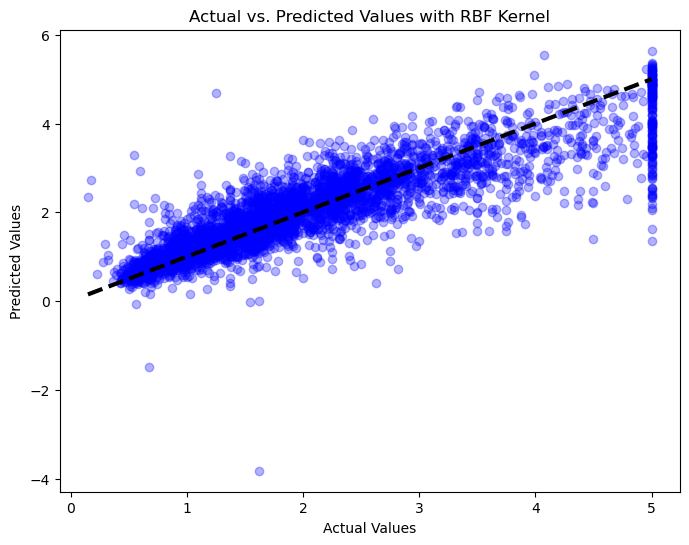

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rbf_best, c='blue', alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=3)
plt.title('Actual vs. Predicted Values with RBF Kernel')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

As shown by the model performance, the regression fit shown by the black dotted line also highlights a good fit of the model with the predicted and actual values. The outliers are mostly due to the skewness of the data itself. However, overall RBF seems to best capture underlying relationship of the dataset.

### 1.3 Bayesian Linear Regression

Bayesian Regression has several different types. However, for the next analysis, we will use Bayesian Linear Regression using Bayesian Ridge model. Bayesian Regression focuses on discovering the posterior distribution of model parameters rather than single best point estimate. For prediction of the model, we will compute posterior predictive distribution. This method is less prone to overfitting.

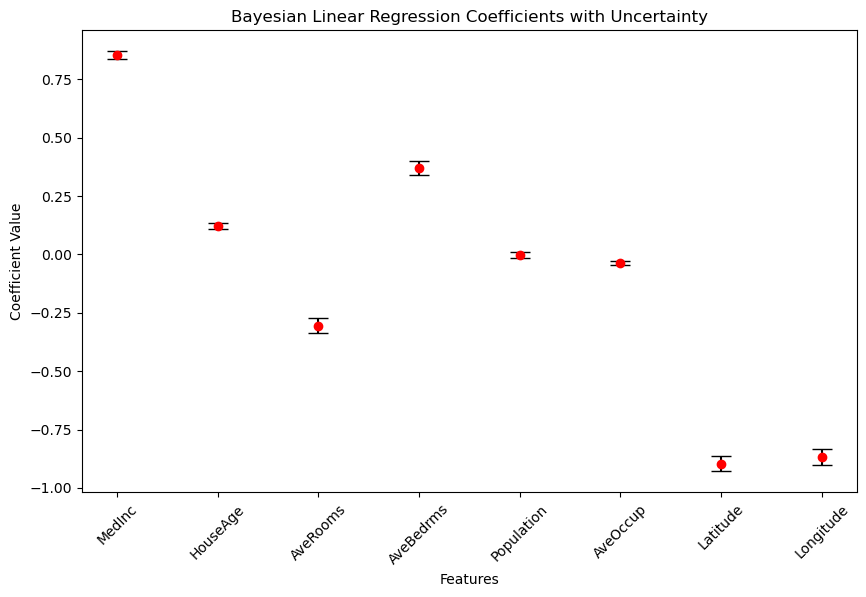

In [11]:
#Bayesian Model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)

feature_names = scaled_features_X.columns


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef,
             fmt='ro', 
             ecolor='black',
             capsize=7)
plt.xticks(range(len(bayesian_model.coef_)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.show()

The plot shows the coefficient of each feature along with its uncertainty range. The confidence interval taken for the analysis is 95%. The magnitude of coefficient value shows its relationship with the target variable along with the direction of relationship. In this case, MedInc (Median Income) shows the strongest and positive relationship with target variable. The uncertainty around MedInc is also lower so the model is more confident on its impact on the target variable. The other important feature seems to be AveBedrms (Average Bedroom). However, the uncertainty seems higher for this variable shown by the error bar. The latitude and longitude show negative relationship with target variable. However, their coefficient value also seems to have higher uncertainty compared to others. 

#### Posterior Distribution with MedInc and AveBedrms

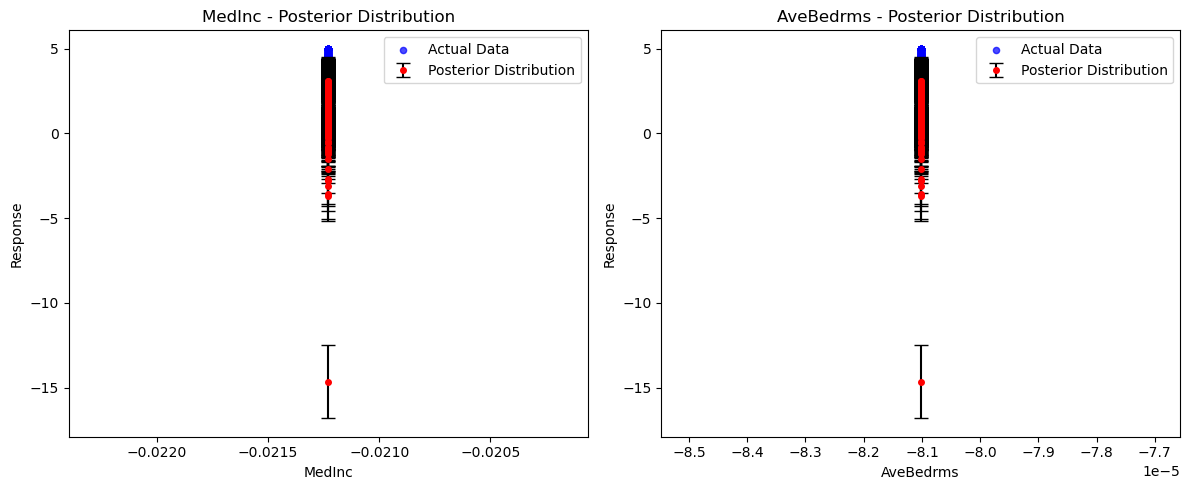

In [12]:
# Selected predictors
selected_predictors = ['MedInc', 'AveBedrms']


# Test data with selected predictors as constant values
x_values = X_test.copy()
for predictor in selected_predictors:
    x_values.loc[:, predictor] = np.mean(x_values[predictor])

# Predict using the model for the modified test data
y_pred, y_std = bayesian_model.predict(x_values, return_std=True)

# Create individual subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(selected_predictors), figsize=(12, 5))  # Adjusted ncols

for i, predictor in enumerate(selected_predictors):
    # Plotting the posterior distribution
    axes[i].errorbar(x_values[predictor], y_pred, yerr=1.96 * y_std, fmt='o', markersize=4, color='red', ecolor='black', capsize=5, label='Posterior Distribution')
    axes[i].scatter(x_values[predictor], y_test, c='blue', alpha=0.7, label='Actual Data', s=20)
    axes[i].set_title(f'{predictor} - Posterior Distribution')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Response')
    axes[i].legend()

plt.tight_layout()
plt.show()


To generate the plot, the assistance of generative AI (ChatGPT) was taken to select only 2 predictors for posterior distribution. We have chosen two features that showed the most important relationship with target variable. It can be clearly seen that the except for outliers at 5 in target variable, most of the actual data has been covered by the red error bar. So, the model has more accurately predicted the variability of the actual data. The level of uncertainty seems slightly higher in case of AveBedrms than MedInc.

#### Model Performance

In [13]:
#Model Performance
r2_bayesian = r2_score(y_test, y_pred_bayesian)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

print(f'Mean Squared Error : {mse_bayesian}')
print(f'R2 score: {r2_bayesian}')


Mean Squared Error : 0.555825511936639
R2 score: 0.5758381381950067


#### Regression Fit for Bayesian Linear Regression

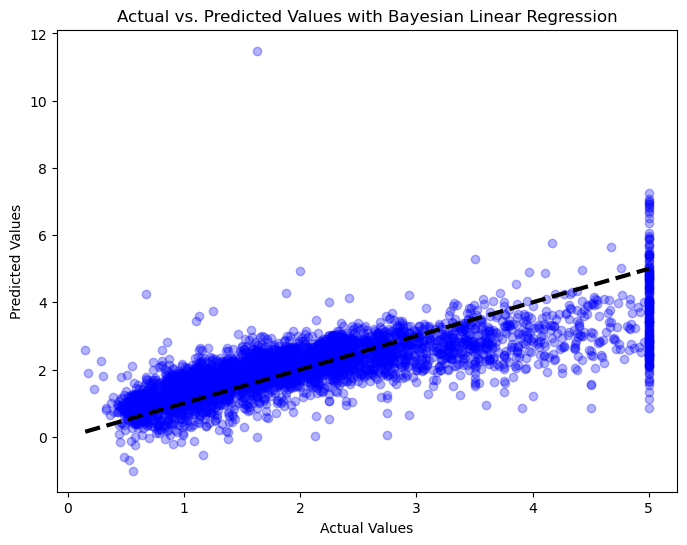

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bayesian, c='blue', alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=3)
plt.title('Actual vs. Predicted Values with Bayesian Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The model performance of Bayesian Linear Regression suggests a low MSE and a positive R-squared score. The model is able to predict 57.5% variance in the target variable through independent variables. It shows a good predictive model performance. Mean Squared Error is also low which is a good predictor. The regression fit also shows most points lying close to the regression line.

### 1.4 Gaussian Process Regression

Gaussian Process Regression (GPR) provides a complete probability distribution over all possible values. The model predicts a distribution of functions rather than a single output value for a given input. The Matern Kernel is a type of kernel function as it is a flexible kernel that can be adjusted to control the smoothness of the functions modeled by the GPR. It is also less sensitive to outliers as it can adapt to the underlying complexity. For this analysis, Matern Kernel will be used with Gaussian Process Regressor.

In [15]:
from sklearn.gaussian_process.kernels import Matern
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5)
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)

gpr_model.fit(X_train, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test, return_std=True)

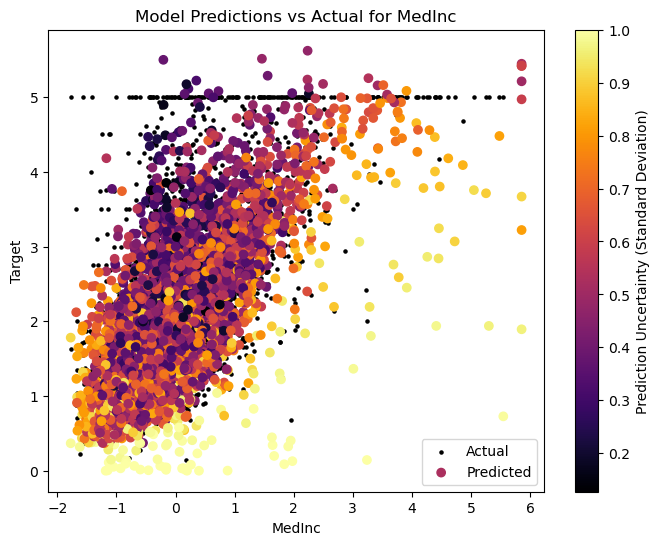

In [16]:
feature_names = scaled_features_X.columns
selected_feature_index = feature_names.get_loc('MedInc')  
selected_feature = X_test.iloc[:, selected_feature_index]

#Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(selected_feature, y_test, color='black', s=5, label='Actual')
scatter = plt.scatter(selected_feature, y_pred_gpr, c=std_dev_gpr, cmap='inferno', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.title('Model Predictions vs Actual for MedInc')
plt.legend()
plt.show()

The plot showcases the actual and predicted values for the most important feature - MedInc. It showcases prediction uncertainty using lighter and darker colors. Here, light colors show higher uncertainty and standard deviation, while darker colors are more closer to the actual values. Based on the visualization, it can be clearly seen that lighter colours are more towards the increasing end of median income and much further away from actual values. This represents that as median income increases, the model has higher uncertainty on its predicted values. Overall, the model seems to have high accuracy of predicting values similar to actual values due to the overlap seen between black dots and colored dots on most cases.

In [17]:
#Model Performance
r2_gpr = r2_score(y_test, y_pred_gpr)
mse_gpr = mean_squared_error(y_test, y_pred_gpr)

print(f'R-squared (R2) Score: {r2_gpr}')
print(f'Mean Squared Error (MSE): {mse_gpr}')
      

R-squared (R2) Score: 0.6647416895947702
Mean Squared Error (MSE): 0.43932549998488757


#### Regression Fit for Gaussian Process Regression

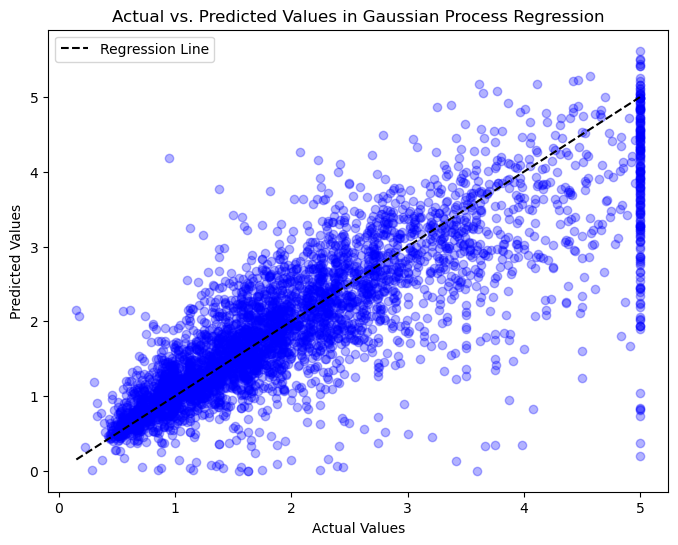

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gpr, c='blue', alpha = 0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Gaussian Process Regression')
plt.legend()
plt.show()

The performance of the model is evaluated by using MSE and R-squared. The R-squared value of 0.66 suggests 66% variance in median house value is due to the independent variables. The higher R-squared value shows better predictive performance of the model. MSE score suggests difference between actual and predicted values, hence, lower MSE value is better. The regression fit plot also shows a good predictive performance in most case, however, there are several values that fall beyond the regression line which suggests discrepancy between actual and predicted values. Overall, there seems to be variability in prediction accuracy. 

### 1.5 Comparative Analysis

#### 1.5.1 Regression Fit

The regression fit of all three techniques shows different spread of actual and predicted value in relation to regression line. The Gaussian Process Regression looks more spread out and deviated from the regression line. Bayesian and RBF Kernel Ridge Regression looks mostly closer to the regression line. This suggests that the model accuracy to predict is high and shows strong model performance. However, we will further compare R-squared and MSE values to see the best performance among the three.

#### 1.5.2 Performance Evaluation - R-squared and MSE

In [19]:
performance = pd.DataFrame({
'Models': ['RBF-KRR', 'Bayesian','Gaussian'],
'MSE': [mse_rbf_best, mse_bayesian,mse_gpr],
'R2': [r2_linear_best,r2_bayesian,r2_gpr]
})

print(performance)

     Models       MSE        R2
0   RBF-KRR  0.315298 -2.701050
1  Bayesian  0.555826  0.575838
2  Gaussian  0.439325  0.664742


Based on the model performance evaluation, RBF under Kernel Ridge Regression seems to perform best followed by Gaussian Process Regression. The R-squared is 0.75 which is higher than the other techniques while MSE is lowest which shows less difference between actual and predicted values. Thus, Kernel Ridge Regression using RBF method shows the best model performance.

### 1.6 Conclusion

#### Kernel Ridge Regression
Comparing the computational efficiency and effectiveness of each model, Kernel Ridge Regression has several different hyperparameters and methods which can be useful for different kind of analysis. It showed the best performance among all other which also suggests its ability to understand complex relationship. Its difficult to decide on which Kernel might be the best. It completely depends on the dataset. In this case, RBF showed the best performance compared to the other two. In terms of hyperparameter, smaller alpha 0.01 for rbf showed the best performance while gamma was 0.1. We used different parameters and tuned them. Hence, the most crucial thing in KRR is to try different hyperparameters and techniques to find the best fit for the model. Computationally, it wasn't very complex and didn't take as much time. It was easy to interpret once the best hyperparameters were decided using GridSearch Cross Validation.

#### Bayesian Linear Regression
Bayesian had a very different approach to predicting values. It provided uncertainty estimates along with the prediction. It is best suited to avoid overfitting. The coefficients could be analyzed through posterior distribution which showed the magnitude and direction of the impact on target variable. It was moderately complex to analyze. It allowed to see how well the model is predicting based on distribution of each feature. Through the visualization, it was easier to understand relationship of actual values with uncertainty of the prediction. 

#### Gaussian Process Regression
In terms of Gaussian Process Regression, it was the most computationally challenging. It took very long to process, but it is suitable for analyzing complex, and non linear relationships. It is also highly depend on choice of kernel and hyperparameter. However, due to computational limitation, it wasn't possible to try different methods to find the best one. Similar to Bayesian, it also provided uncertainty estimates for the prediction which allowed us to analyze the accuracy and reliability of the prediction. Hence, it is highly flexible to capture complex relationship, however, computationally challenging.